Red Neuronal Perceptrón Multicapa (MLP)
Utilizando dataset Fashion MNIST para el entrenamiento y las predicciones.
Autor: Rafael Alberto Payan Urquidez

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# Para tener en cuenta la versión de TensorFlow, debido a que la API de Keras ha cambiado
# en las versiones más recientes de TensorFlow y puede afectar al funcionamiento.
print(tf.__version__)

2.19.0


Cargamos el dataset Fashion MNIST y los nombres de las clases para la visualización

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Preprocesamiento de los datos

In [3]:
# Normalizar los valores de los píxeles al rango [0, 1]
train_images = train_images / 255.0
test_images = test_images / 255.0

# Aplanar las imágenes para la MLP
train_images_flat = train_images.reshape(train_images.shape[0], 28 * 28)
test_images_flat = test_images.reshape(test_images.shape[0], 28 * 28)

print(f"Forma de las imágenes de entrenamiento aplanadas: {train_images_flat.shape}")
print(f"Forma de las imágenes de prueba aplanadas: {test_images_flat.shape}")

Forma de las imágenes de entrenamiento aplanadas: (60000, 784)
Forma de las imágenes de prueba aplanadas: (10000, 784)


Construcción del modelo MLP

In [4]:
model_mlp = keras.Sequential([
    keras.layers.Input(shape=(28 * 28,)),  # Capa de entrada con 784 neuronas
    keras.layers.Dense(128, activation='relu'), # Primera capa oculta densa con activación ReLU
    keras.layers.Dropout(0.2), # Dropout para regularización
    keras.layers.Dense(64, activation='relu'),  # Segunda capa oculta densa
    keras.layers.Dense(10, activation='softmax') # Capa de salida con 10 neuronas (una por clase) y activación softmax
])

Compilación del modelo

In [5]:
model_mlp.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy', # Usar para etiquetas enteras
                  metrics=['accuracy'])

model_mlp.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

Entrenamiento del modelo

In [6]:
history_mlp = model_mlp.fit(train_images_flat, train_labels, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7398 - loss: 0.7385 - val_accuracy: 0.8537 - val_loss: 0.4023
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8469 - loss: 0.4210 - val_accuracy: 0.8703 - val_loss: 0.3613
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8589 - loss: 0.3795 - val_accuracy: 0.8618 - val_loss: 0.3725
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8637 - loss: 0.3666 - val_accuracy: 0.8508 - val_loss: 0.3992
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8732 - loss: 0.3473 - val_accuracy: 0.8711 - val_loss: 0.3612
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8763 - loss: 0.3275 - val_accuracy: 0.8823 - val_loss: 0.3291
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8829 - loss: 0.3163 - val_accuracy: 0.8834 - val_loss: 0.3301
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8873 - loss: 0.3047 - 

Evaluación del modelo

In [7]:
test_loss_mlp, test_acc_mlp = model_mlp.evaluate(test_images_flat, test_labels, verbose=2)
print(f'\nPrecisión en el conjunto de prueba (MLP): {test_acc_mlp:.4f}')

313/313 - 1s - 4ms/step - accuracy: 0.8742 - loss: 0.3538

Precisión en el conjunto de prueba (MLP): 0.8742


Visualización del historial de entrenamiento

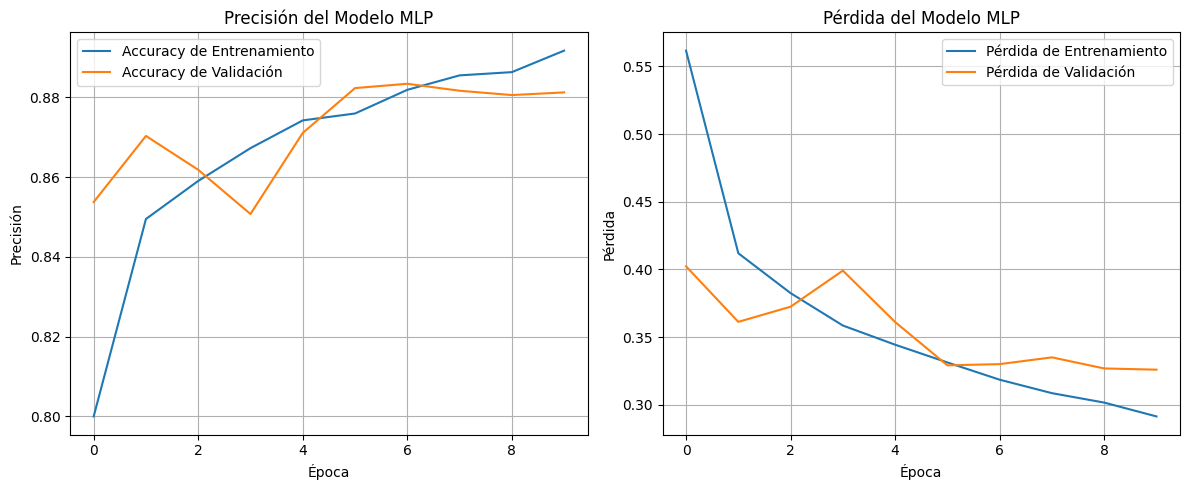

In [8]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_mlp.history['accuracy'], label='Accuracy de Entrenamiento')
plt.plot(history_mlp.history['val_accuracy'], label='Accuracy de Validación')
plt.title('Precisión del Modelo MLP')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history_mlp.history['loss'], label='Pérdida de Entrenamiento')
plt.plot(history_mlp.history['val_loss'], label='Pérdida de Validación')
plt.title('Pérdida del Modelo MLP')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


Realizar predicciones y visualizar algunas

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


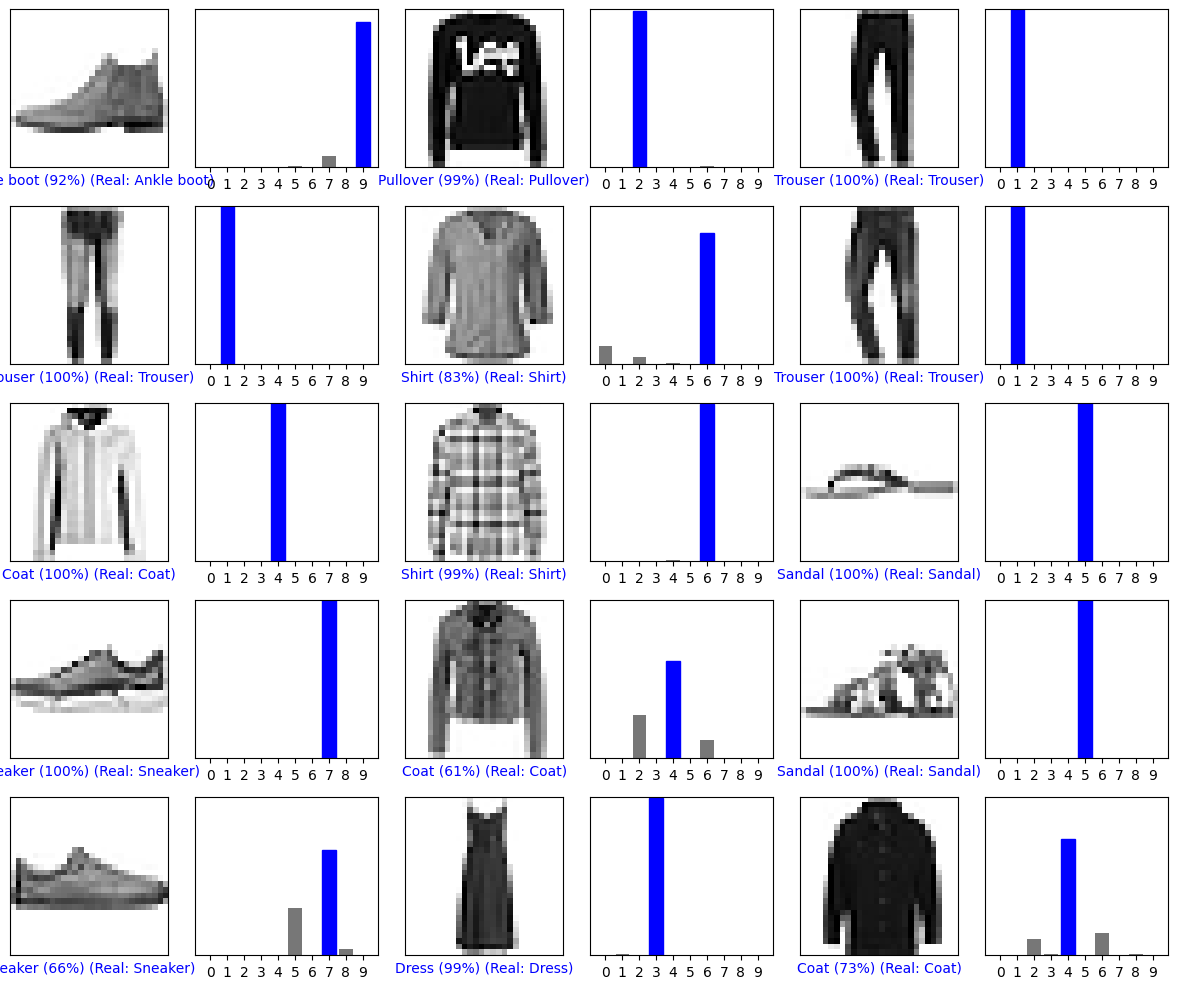

In [9]:
predictions_mlp = model_mlp.predict(test_images_flat)

def plot_image_prediction(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img.reshape(28, 28), cmap=plt.cm.binary) # Asegurarse de que la imagen sea 28x28

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel(f"{class_names[predicted_label]} ({100*np.max(predictions_array):.0f}%) (Real: {class_names[true_label]})",
               color=color)

def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plot_image_prediction(i, predictions_mlp[i], test_labels, test_images)
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
    plot_value_array(i, predictions_mlp[i], test_labels)
plt.tight_layout()
plt.show()